In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [9]:
import pandas as pd

# Update this path to match your system's actual path
df = pd.read_csv('iris.csv')
df.head()
print(df.columns)


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [23]:
from sklearn.preprocessing import StandardScaler

X = df.drop("Species", axis=1)
y = df["Species"]





In [24]:
# Check column names
print("Columns in dataset:", df.columns)

# Adjust column names accordingly
# If the column is 'Species' (with capital S)
X = df.drop("Species", axis=1)
y = df["Species"]

# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Columns in dataset: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [25]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = []

# Loop through values of K from 1 to 10
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"K = {k} -> Accuracy: {acc:.2f}")


K = 1 -> Accuracy: 1.00
K = 2 -> Accuracy: 1.00
K = 3 -> Accuracy: 1.00
K = 4 -> Accuracy: 1.00
K = 5 -> Accuracy: 1.00
K = 6 -> Accuracy: 1.00
K = 7 -> Accuracy: 1.00
K = 8 -> Accuracy: 1.00
K = 9 -> Accuracy: 1.00
K = 10 -> Accuracy: 1.00


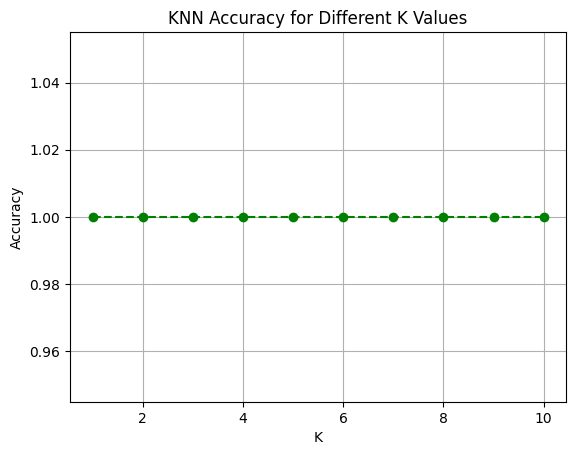

In [27]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), accuracy_scores, marker='o', linestyle='--', color='green')
plt.title("KNN Accuracy for Different K Values")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


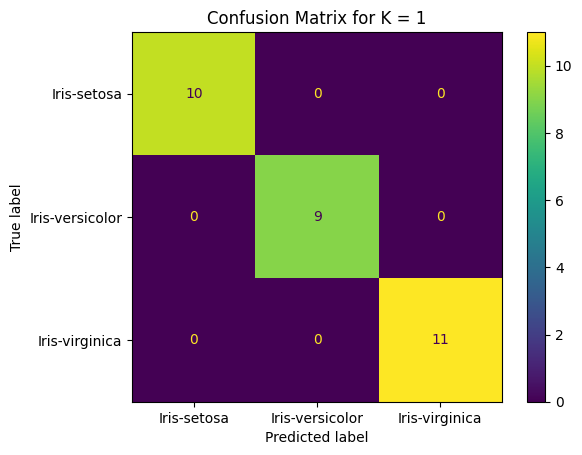

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get best K
best_k = accuracy_scores.index(max(accuracy_scores)) + 1

# Final KNN model
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_final.classes_)
disp.plot()
plt.title(f"Confusion Matrix for K = {best_k}")
plt.show()


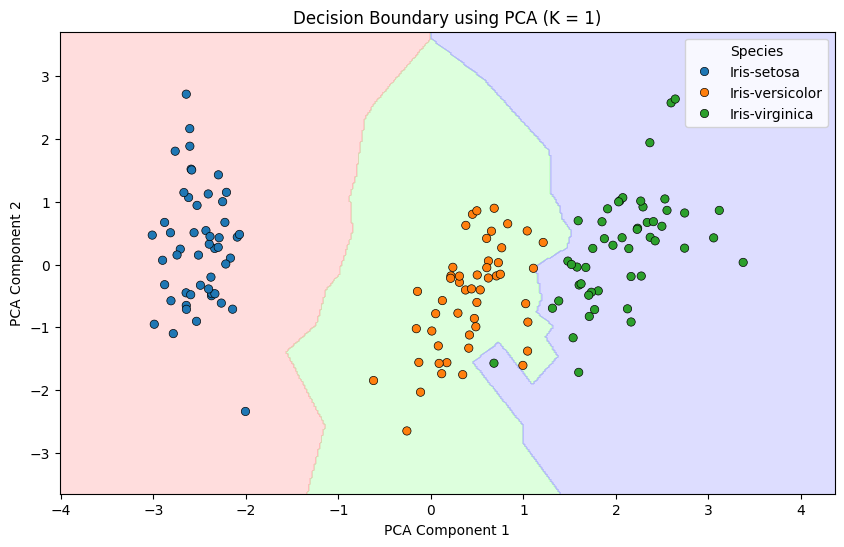

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce features to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Encode species labels to numbers for plotting
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the 2D PCA-transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Train KNN on reduced 2D data
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_pca, y_train_pca)

# Create mesh grid
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)

# Plot original data points (still colored by string labels)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, edgecolor='black')
plt.title(f"Decision Boundary using PCA (K = {best_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
